In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        
        if end_ix > len(timeseries_data)-1:
            break
    
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:

timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)
print(X),print(y)
print(X.shape)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]
(6, 3)


In [6]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X)

[[[110]
  [125]
  [133]]

 [[125]
  [133]
  [146]]

 [[133]
  [146]
  [158]]

 [[146]
  [158]
  [172]]

 [[158]
  [172]
  [187]]

 [[172]
  [187]
  [196]]]


In [7]:

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=1)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 35792.0508
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 34425.0977
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 33263.5469
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 32296.6719
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 31584.1270
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 31063.6191
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 30583.4219
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 30129.0684
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 29662.8125
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 29136.4238
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 28529.7129
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 27814.4375
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 26940.6777
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 25954.9375
Epoch 15/300
1/1 ━━━━━━━━━━━━━━

In [9]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
 

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
print(lst_output)
print(timeseries_data)
len(timeseries_data)



[223.54028]
1 day input [196.        210.        223.5402832]
1 day output [[233.3401]]
2 day input [210.         223.5402832  233.34010315]
2 day output [[246.60825]]
3 day input [223.54028 233.3401  246.60825]
3 day output [[259.1746]]
4 day input [233.3401  246.60825 259.1746 ]
4 day output [[270.14087]]
5 day input [246.60825 259.1746  270.14087]
5 day output [[283.06332]]
6 day input [259.1746  270.14087 283.06332]
6 day output [[295.4654]]
7 day input [270.14087 283.06332 295.4654 ]
7 day output [[307.51212]]
8 day input [283.06332 295.4654  307.51212]
8 day output [[320.5659]]
9 day input [295.4654  307.51212 320.5659 ]
9 day output [[333.44852]]
[223.54028, 233.3401, 246.60825, 259.1746, 270.14087, 283.06332, 295.4654, 307.51212, 320.5659, 333.44852]
[110, 125, 133, 146, 158, 172, 187, 196, 210]


9

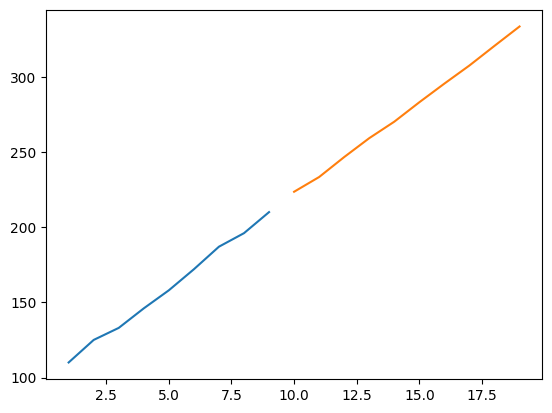

In [11]:
# Visualizing The Output
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)